In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
path_base = os.getcwd().split('Dragonfly44_SFH')[0] # hack, but works

from Dragonfly44_SFH.utils import prospect_io, plotting
from figure_style import *
from Dragonfly44_SFH.utils.styles import *

In [2]:
# contains filenames of Prospector output
from Dragonfly44_SFH.fitting.output.fits_DF44_summary import *

path_data = path_base+ "Dragonfly44_SFH/data/"
file_data = path_data+"Dragonfly44/obs_phot_specKCWI_sigma110.h5"

path_fits = path_base+ "Dragonfly44_SFH/fitting/output/"


In [3]:
result_file1 = path_fits+ fit_aD1_phot_specKCWI
label1 = 'Extended'
color1 = color_aD1

result_file2 = path_fits+ fit_aD02_phot_specKCWI
label2 = 'Concentrated'
color2 = color_aD02

# NOT okay if model fails to load, this should work! needed to make draws from model priors
result1, obs1, model1 = prospect_io.read_results( result_file1, file_data=file_data )
result2, obs2, model2 = prospect_io.read_results( result_file2, file_data=file_data )

label0 = "SFH prior:" # label which related to label1, label2

In [4]:
# setup styling

obs_params1 = {'marker':'o', 'color':'k', 'ms':20}
obs_params2 = obs_params1

posts_params1={'color':color1}
posts_params2={'color':color2}

bestfit_params1=marker_params_aD1
bestfit_params2=marker_params_aD02

plot_params1 = dict( obs=obs1, result=result1, zobs=zobs_DF44, label=label1,
                     obs_params=obs_params1, posts_params=posts_params1, bestfit_params=bestfit_params1 )

plot_params2 = dict( obs=obs2, result=result2, zobs=zobs_DF44, label=label2,
                     obs_params=obs_params2, posts_params=posts_params2, bestfit_params=bestfit_params2 )


In [5]:
# draw samples from model priors
ndraws = int(1e3) # better to have more draws, but takes longer

prior_draws1 = prospect_io.get_sfh_priors( model1, ndraws )
prior_draws2 = prospect_io.get_sfh_priors( model2, ndraws )

plot_params1['priors_params']={'facecolor':'None', 'edgecolor':color1, 'hatch':'//', 'lw':0 }
plot_params2['priors_params']={'facecolor':'None', 'edgecolor':color2, 'hatch':'\\\\', 'lw':0 }


In [11]:
from Dragonfly44_SFH.fitting.prospect.sources.constants import cosmo
# comology used in fitting

from Dragonfly44_SFH.utils.transforms import chain_to_sfr


/var/folders/80/0tdn3l0x0cj7l42vzb8rr2xh0000gn/T/ipykernel_7648/3036944628.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels( ax_cmf.get_xticks() )


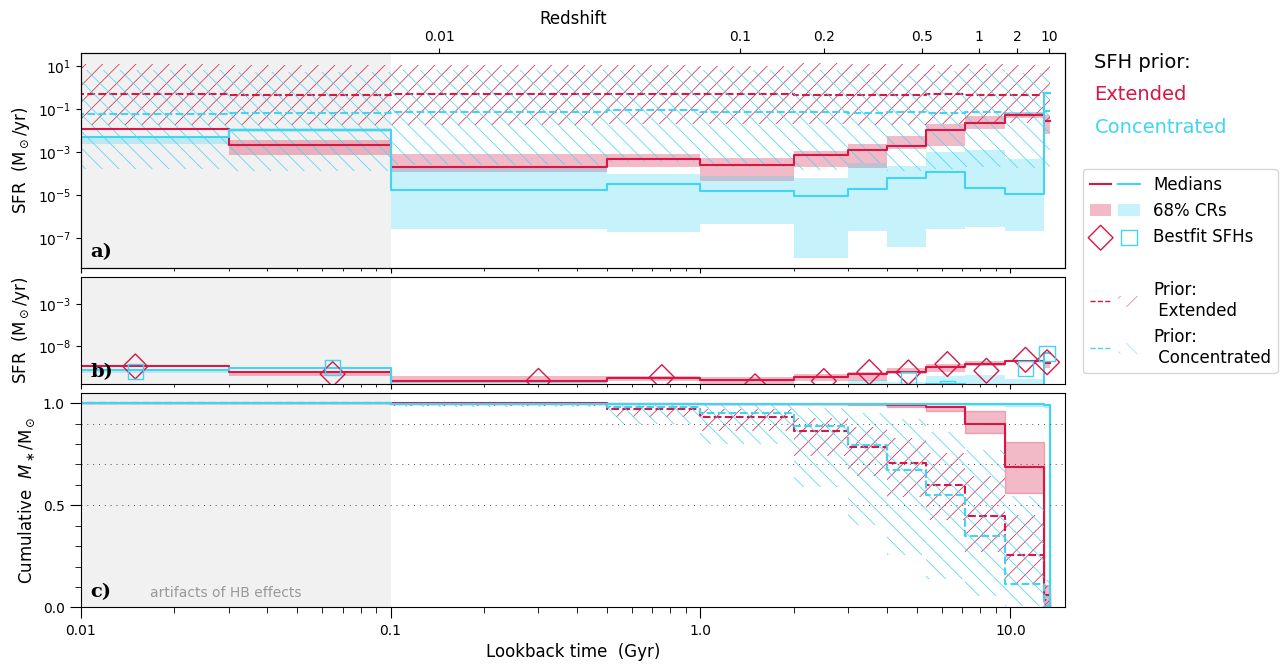

In [12]:
fig, axes = plt.subplots(3,1, 
                         figsize=(fig_width_two*0.9,0.38*textheight), 
                         gridspec_kw={'height_ratios':[2,1,2]}, 
                         sharex=True)
fig.subplots_adjust( wspace=0.05, hspace=0.05 )        
ax_ssfr,ax_sfr,ax_cmf = axes.flatten()

for plot_params, prior_draws in [ [plot_params1,prior_draws1],[plot_params2,prior_draws2] ]:
    sfrs_post = chain_to_sfr( norm_by_mass=False, **plot_params['result'] )
    ssfrs_post = chain_to_sfr( norm_by_mass=True, **plot_params['result'] )

    plotting.plot_sfh( ax_ssfr, sfrs_post=sfrs_post, prior_draws=prior_draws, show_bestfit=False, **plot_params )
    
    plotting.plot_sfh( ax_sfr, sfrs_post=ssfrs_post, prior_draws=prior_draws, show_priors=False, **plot_params )

    plotting.plot_cmf( ax_cmf, sfrs_post=sfrs_post, prior_draws=prior_draws, xscale='linear', style='step', show_bestfit=False, **plot_params )

[ ax.set_xlabel(None) for ax in axes[:-1]]

if True: # axis ticks
    axes[0].set_xscale('log')
    axes[0].set_xlim(0.01, 15 )
    
    ax_sfr.set_ylim(3e-13,2)

    ax_cmf.set_ylim(0,1.05)
    ax_cmf.set_yticks(np.arange(0,1.01,0.5))
    ax_cmf.set_yticks(np.arange(0,1.01,0.1), minor=1)
    for xh in [0.5,0.7,0.9]:
        ax_cmf.axhline( xh, color='0.3', dashes=(1,5), lw=0.7)

    axes[-1].set_xticklabels( ax_cmf.get_xticks() )
    axes[-1].tick_params(direction='out', length=8, which='major')
    axes[-1].tick_params(direction='out', length=4, which='minor')
    
if True: # legend
    ax_legend = axes[0] 
    
    hist_models_kwargs = {"alpha":0.3, "lw":0}
    hist_prior_kwargs = {"alpha":0.6, "lw":0, "facecolor":"None", }
    line_prior_kwargs = {"alpha":1, "lw":1, "ls":"--"}

#     ax_ssfr.get_legend().remove()
    labels, handles = [],[]
    
    handles.append(( ax_sfr.plot([],[], color=color1,)[0],
                     ax_sfr.plot([],[], color=color2,)[0],
                   )
                  )
    labels.append("Medians" )    
    
    handles.append(( ax_sfr.fill_between([],[], color=color1, **hist_models_kwargs),
                     ax_sfr.fill_between([],[], color=color2, **hist_models_kwargs),
                   )
                  )
    labels.append("68% CRs" )

    handles.append(( ax_sfr.scatter([],[], **plot_params1['bestfit_params'] ),
                     ax_sfr.scatter([],[], **plot_params2['bestfit_params'] ),
                   )
                  )     
    labels.append('Bestfit SFHs' )
        
    handles.append( ax_sfr.scatter([],[], edgecolor='None', facecolor='None', marker='.', s=0) )
    labels.append("" )
        
    handles.append(( ax_sfr.plot([],[], 
                                 color=plot_params1['priors_params']['edgecolor'], 
                                 **line_prior_kwargs)[0] ,
                     ax_sfr.fill_between([],[], 
                                         edgecolor=plot_params1['priors_params']['edgecolor'], 
                                         hatch=plot_params1['priors_params']['hatch'], 
                                         **hist_prior_kwargs), 
                   )
                  )     
    labels.append("Prior:\n {}".format(label1) )

    handles.append( 
                   ( ax_sfr.plot([],[], 
                                 color=plot_params2['priors_params']['edgecolor'], 
                                 **line_prior_kwargs)[0] ,
                     ax_sfr.fill_between([],[], 
                                         edgecolor=plot_params2['priors_params']['edgecolor'], 
                                         hatch=plot_params2['priors_params']['hatch'], 
                                         **hist_prior_kwargs), 
                   )
                  )
    labels.append("Prior:\n {}".format(label2) )

    ax_legend.legend( handles, labels, numpoints=1, loc=2, ncol=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=3, bbox_to_anchor=[1.01,0.5] ) 
    
if True: # top axis    
    zvals = [0.01,0.1,0.2,0.5,1,2,10]
    ages = [cosmo.age(0).value-cosmo.age(z).value for z in zvals]
    tax0 = axes[0].twiny()
    tax0.set_xscale('log')
    tax0.set_xticks(ages)
    tax0.set_xticks([], minor=True)
    tax0.set_xticklabels(zvals)
    tax0.set_xlim(ax_sfr.get_xlim())
    tax0.set_xlabel('Redshift') 

if True: # labels
    xtext, ytext = 1.03, 1
    ax_ann = axes[0]
    annparams = dict( xy=(0,0), va='top', xycoords='axes fraction', fontsize=14)    
    ax_ann.annotate( label0, color='k', xytext=(xtext,ytext), ha='left', **annparams )
    ax_ann.annotate( label1, color=color1, xytext=(xtext,ytext-0.15), ha='left', **annparams )
    ax_ann.annotate( label2, color=color2, xytext=(xtext,ytext-0.3), ha='left', **annparams ) 
    
if True: # panel labels
    ann_params = dict( xy=(0,0), xytext=(0.01,0.03),xycoords="axes fraction", ha="left", va="bottom", \
                       fontsize=14, family="serif", weight="bold" )
    ax_ssfr.annotate("a)", **ann_params)
    ax_sfr.annotate("b)", **ann_params)
    ax_cmf.annotate("c)", **ann_params)   

if True: # annotations
    for ax in axes:
        ax.axvspan(0,0.1, color='lightgrey', alpha=0.3, zorder=-100, lw=0)
    text = axes[-1].annotate( "artifacts of HB effects", xy=(0,0), xytext=(0.07,0.05), xycoords='axes fraction', \
                         fontsize=10, color='0.6', zorder=-99)

plt.savefig('figures/fig4.pdf', **saveparams)
plt.show()

Note: Fig 4 as appears in Webb+2020 failed to take the logarithm of the time bin when calculating the prior CMF (hatched shapes in third panel)